In [1]:
import cv2 # For capturing Videos

import math

import matplotlib.pyplot as plt # I dont think I need this anymore
%matplotlib inline

import pandas as pd # For creating my training map

from keras.preprocessing import image # For preprocessing Images

import numpy as np # For converting my images into arrays to be fed into my model

from keras.utils import np_utils

from skimage.transform import resize # For resizing Images

from skimage.io import imread # To read the image

from skimage.io import imshow # to show the image

In [ ]:
# Only use this when splicing a video file (Image Sequencing?)

count = 0
video_file = 'batch_??/Training_Video_01.mp4'
cap = cv2.VideoCapture(video_file)
frame_rate = cap.get(5)
x = 1
while(cap.isOpened()):
    frame_id = cap.get(1)
    ret, frame = cap.read()
    if(ret != True):
        break
    if(frame_id % math.floor(frame_rate) == 0):
        filename = "Train/batch_??_%dframe.jpg" % count; count = count + 1
        cv2.imwrite(filename, frame)
cap.release()
print("Done")

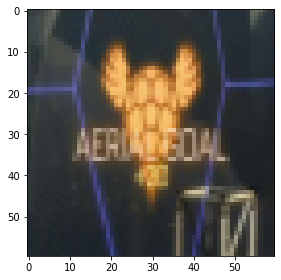

In [2]:
# To see an example:
img =imread('Train/Aerial Goals/batch_01_frame188.jpg')
# Resize and Crop the Image

#imshow(img)

test_1 = resize(img, output_shape=(300,300))
imshow(test_1[30:90, 120:180])

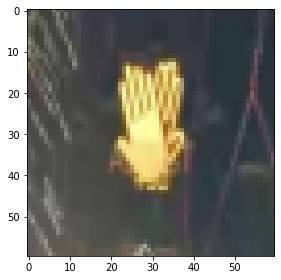

In [3]:
# Another Example
img2 =imread('Train/Assists/batch_06_frame296.jpg')
# Resize and Crop the Image

#imshow(img)

test_2 = resize(img2, output_shape=(300,300))[30:90, 120:180]
imshow(test_2)

In [13]:
# Creating Data Frame with the mapping of the features (dummified items)
import os

labels = os.listdir('Train') 

image_id_column = []
for folder_name in labels:
    image_id_column = image_id_column + os.listdir(f'Train/{folder_name}')

class_column = []
for folder_name in labels:
    folder = os.listdir(f'Train/{folder_name}')
    for image_id in folder:
        class_column.append(folder_name)
        
training_map = pd.DataFrame([image_id_column, class_column]).transpose()
training_map.columns = ['Image_ID', 'Classification']
training_map = pd.get_dummies(training_map, columns=['Classification'])

In [14]:
# Converting images into pixels
X = [] 

for folder in labels:
    images_by_folder = os.listdir(f'Train/{folder}')
    for image_id in images_by_folder:
        img = plt.imread(f'Train/{folder}/' + image_id)
        X.append(img)

X = np.array(X)  # Entire array of images for training/validation.

In [15]:
print(len(X))

5246


In [16]:
Y = training_map
Y.shape

(5246, 23)

In [17]:
# Resizes images and crops them for Keras Model
image = []
for i in range(0, X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(300,300)).astype(int) # Crop shape: [30:90, 120:180]
    image.append(a)

X = np.array(image)


In [18]:
print(X)

[[[[30 32 31]
   [30 32 31]
   [31 33 32]
   ...
   [35 29 26]
   [39 30 27]
   [40 32 22]]

  [[29 31 30]
   [29 32 31]
   [30 33 32]
   ...
   [36 30 28]
   [37 30 25]
   [38 33 23]]

  [[28 32 31]
   [28 32 31]
   [29 32 31]
   ...
   [34 28 28]
   [35 31 26]
   [41 41 29]]

  ...

  [[36 14 16]
   [34 13 12]
   [36 13 15]
   ...
   [28 32 20]
   [26 31 22]
   [26 31 23]]

  [[33 13 14]
   [32 12 11]
   [35 14 16]
   ...
   [27 32 23]
   [26 30 23]
   [26 30 23]]

  [[33 13 14]
   [33 13 12]
   [33 12 14]
   ...
   [25 30 24]
   [26 30 24]
   [26 30 24]]]


 [[[18 27 32]
   [17 26 31]
   [22 31 36]
   ...
   [97 97 92]
   [74 75 61]
   [67 68 51]]

  [[16 25 30]
   [16 25 30]
   [18 27 32]
   ...
   [87 86 79]
   [75 75 61]
   [80 80 64]]

  [[16 25 30]
   [16 25 30]
   [18 27 32]
   ...
   [90 87 75]
   [82 80 65]
   [75 73 59]]

  ...

  [[36 19 22]
   [39 17 23]
   [41 18 24]
   ...
   [29 25 15]
   [24 27 17]
   [24 27 17]]

  [[32 18 21]
   [36 15 20]
   [37 17 21]
   ...
   [2

In [19]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X)

In [20]:
print(X)

[[[[ -72.939     -84.779     -93.68    ]
   [ -72.939     -84.779     -93.68    ]
   [ -71.939     -83.779     -92.68    ]
   ...
   [ -77.939     -87.779     -88.68    ]
   [ -76.939     -86.779     -84.68    ]
   [ -81.939     -84.779     -83.68    ]]

  [[ -73.939     -85.779     -94.68    ]
   [ -72.939     -84.779     -94.68    ]
   [ -71.939     -83.779     -93.68    ]
   ...
   [ -75.939     -86.779     -87.68    ]
   [ -78.939     -86.779     -86.68    ]
   [ -80.939     -83.779     -85.68    ]]

  [[ -72.939     -84.779     -95.68    ]
   [ -72.939     -84.779     -95.68    ]
   [ -72.939     -84.779     -94.68    ]
   ...
   [ -75.939     -88.779     -89.68    ]
   [ -77.939     -85.779     -88.68    ]
   [ -74.939     -75.779     -82.68    ]]

  ...

  [[ -87.939    -102.779     -87.68    ]
   [ -91.939    -103.779     -89.68    ]
   [ -88.939    -103.779     -87.68    ]
   ...
   [ -83.939     -84.779     -95.68    ]
   [ -81.939     -85.779     -97.68    ]
   [ -80.939    

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [22]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [23]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

In [24]:
X_train = base_model.predict(X_train)

In [25]:
X_test = base_model.predict(X_test)

In [26]:
print(X_train.shape)
print(X_test.shape)

(4196, 9, 9, 512)
(1050, 9, 9, 512)


In [27]:
X_train = X_train.reshape(4196, 9*9*512)
X_test = X_test.reshape(1050, 9*9*512)

In [28]:
train = X_train/X_train.max()
X_test = X_test/X_train.max()

In [30]:
model = Sequential()
model.add(InputLayer((9*9*512)))
model.add(Dense(units = 1024, activation='sigmoid'))
model.add(Dense(23, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1024)              42468352  
_________________________________________________________________
dense_3 (Dense)              (None, 23)                23575     
Total params: 42,491,927
Trainable params: 42,491,927
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.fit(train, Y_train, epochs=5, validation_data=(X_test, Y_test))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).